# Explore here

In [65]:
#libraries imported 
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler





In [66]:


# Define the URL of the dataset and the path where to save it   
dataset_url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
save_dir = '/workspaces/machine-learning/data/raw'
file_name = 'AB_NYC_2019.csv'
save_path = os.path.join(save_dir, file_name)
file_path = '/workspaces/machine-learning/data/raw/AB_NYC_2019.csv'


# Download the dataset
response = requests.get(dataset_url)
if response.status_code == 200:
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Dataset downloaded and saved as {save_path}")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")



whole_df = pd.read_csv(file_path)


# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Ensure the output is not truncated

print(whole_df.head())
print(whole_df.tail())


Dataset downloaded and saved as /workspaces/machine-learning/data/raw/AB_NYC_2019.csv
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_r

1) dataset relevant informations

In [67]:


# df dimentions  
print(f"Dataset dimensions: {whole_df.shape}")

#displaying the full dataframe 
display(whole_df.head(20))



display(whole_df.tail(20))



Dataset dimensions: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48875,36478343,Welcome all as family,274273284,Anastasia,Manhattan,East Harlem,40.78749,-73.94749,Private room,140,1,0,NaN,NaN,1,180
48876,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Manhattan,Harlem,40.80953,-73.95410,Private room,60,1,0,NaN,NaN,1,26
48877,36479230,Studio sized room with beautiful light,65767720,Melanie,Brooklyn,Bushwick,40.70418,-73.91471,Private room,42,7,0,NaN,NaN,1,16
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,40.74477,-73.87727,Private room,45,1,0,NaN,NaN,5,172
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,NaN,NaN,1,22
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365
48881,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,NaN,1,15
48882,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaN,NaN,1,31
48883,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79755,-73.93614,Private room,75,2,0,NaN,NaN,2,364
48884,36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341


In [68]:


# Drop duplicate columns if any
unique_column_df = whole_df.loc[:, ~whole_df.columns.duplicated()]

# Reset index if needed
unique_column_df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
display(unique_column_df.head(3))
display(unique_column_df.tail(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


2. extracting information about data types and null values

In [69]:


# Print DataFrame info
print(unique_column_df.info())

# Count total null values per column before dropping nulls
print("\nTotal Null before dropping null values:")
print(unique_column_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [70]:
# Drop rows with null values
df = unique_column_df.dropna()

# Print DataFrame info after dropping null values
print("\nDataFrame info after dropping null values:")
print(df.info())
print(df.shape) 
display(df.head(3))
display(df.tail(3))


DataFrame info after dropping null values:
<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,38821.0,1.810081e+07,1.069372e+07,2539.00000,8.721444e+06,1.887286e+07,2.756746e+07,3.645581e+07
host_id,38821.0,6.424582e+07,7.589752e+07,2438.00000,7.029525e+06,2.837092e+07,1.018905e+08,2.738417e+08
latitude,38821.0,4.072813e+01,5.499074e-02,40.50641,4.068864e+01,4.072171e+01,4.076299e+01,4.091306e+01
longitude,38821.0,-7.395115e+01,4.669296e-02,-74.24442,-7.398246e+01,-7.395481e+01,-7.393502e+01,-7.371299e+01
price,38821.0,1.423325e+02,1.969948e+02,0.00000,6.900000e+01,1.010000e+02,1.700000e+02,1.000000e+04
minimum_nights,38821.0,5.869220e+00,1.738903e+01,1.00000,1.000000e+00,2.000000e+00,4.000000e+00,1.250000e+03
number_of_reviews,38821.0,2.929026e+01,4.818290e+01,1.00000,3.000000e+00,9.000000e+00,3.300000e+01,6.290000e+02
reviews_per_month,38821.0,1.373229e+00,1.680328e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,38821.0,5.166611e+00,2.630295e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,38821.0,1.148863e+02,1.295299e+02,0.00000,0.000000e+00,5.500000e+01,2.290000e+02,3.650000e+02


Assuming that the aim of the study is the price of listed AIRbnbs, some columns are more relevant than others. 

Relevant Columns:

neighbourhood_group: Relevant, as the general location can influence the price.

neighbourhood: Relevant, as the specific location can influence the price.

latitude: Relevant, as the geographical position can influence the price.

longitude: Relevant, as the geographical position can influence the price.

room_type: Relevant, as the type of room can influence the price.

price: Relevant, as it is the possible target variable.

minimum_nights: Potentially relevant, as it might influence the price.

number_of_reviews: Potentially relevant, as it might indicate popularity and thus influence the price.

reviews_per_month: Potentially relevant, as it might indicate popularity and thus influence the price.

calculated_host_listings_count: Potentially relevant, as it might indicate the host's experience and thus influence the price.

availability_365: Potentially relevant, as it might indicate availability and thus influence the price.


Columns to Drop:
id

name

host_id

host_name

last_review

In [72]:
# Relevant columns 
relevant_columns = [
    'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 
    'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]

# Create a subset
df_subset = df[relevant_columns]

# Display the first few rows of the subset
display(df_subset.head(3))

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [73]:
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,38821.0,40.728129,0.054991,40.50641,40.68864,40.72171,40.76299,40.91306
longitude,38821.0,-73.951149,0.046693,-74.24442,-73.98246,-73.95481,-73.93502,-73.71299
price,38821.0,142.332526,196.994756,0.00000,69.00000,101.00000,170.00000,10000.00000
minimum_nights,38821.0,5.869220,17.389026,1.00000,1.00000,2.00000,4.00000,1250.00000
number_of_reviews,38821.0,29.290255,48.182900,1.00000,3.00000,9.00000,33.00000,629.00000
reviews_per_month,38821.0,1.373229,1.680328,0.01000,0.19000,0.72000,2.02000,58.50000
calculated_host_listings_count,38821.0,5.166611,26.302954,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,38821.0,114.886299,129.529950,0.00000,0.00000,55.00000,229.00000,365.00000


separating and analysing numerical and categorical variables:

In [74]:
# Check the data types of each column
print("Data Types of df_subset:")
print(df_subset.dtypes)

# Separate numeric columns
numeric_columns = df_subset.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric Variables:")
print(numeric_columns)

# Separate categorical columns (if any)
categorical_columns = df_subset.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables:")
print(categorical_columns)

Data Types of df_subset:
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Numeric Variables:
Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Categorical Variables:
Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [75]:
#analysis of categorical variables

# Frequency count for 'neighbourhood_group'
print("Neighbourhood Group Distribution:")
print(df_subset['neighbourhood_group'].value_counts())

# Frequency count for 'neighbourhood'
print("\nNeighbourhood Distribution (Top 10):")
print(df_subset['neighbourhood'].value_counts().head(10))  # Display top 10 neighbourhoods

# Frequency count for 'room_type'
print("\nRoom Type Distribution:")
print(df_subset['room_type'].value_counts())

Neighbourhood Group Distribution:
neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

Neighbourhood Distribution (Top 10):
neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: count, dtype: int64

Room Type Distribution:
room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64


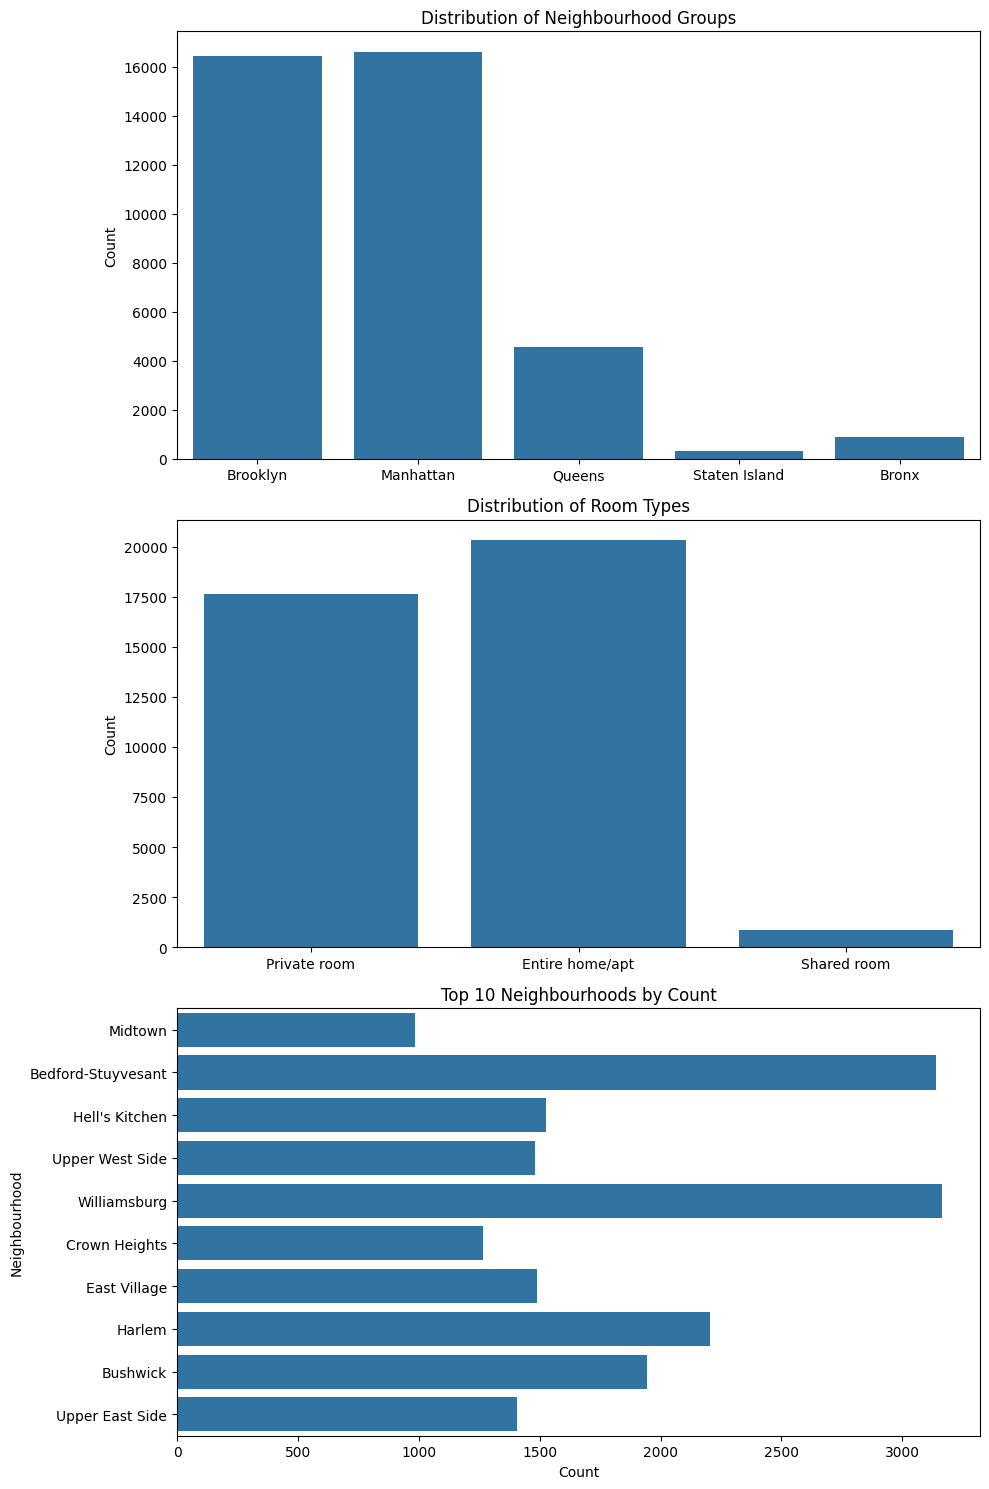

In [76]:
#visualize categorical variables


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for 'neighbourhood_group'
sns.countplot(ax=axes[0], x='neighbourhood_group', data=df_subset)
axes[0].set_title('Distribution of Neighbourhood Groups')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Plot for 'room_type'
sns.countplot(ax=axes[1], x='room_type', data=df_subset)
axes[1].set_title('Distribution of Room Types')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')

# Plot for 'neighbourhood' (top 10 neighbourhoods)
top_10_neighbourhoods = df_subset['neighbourhood'].value_counts().nlargest(10).index
sns.countplot(ax=axes[2], y='neighbourhood', data=df_subset[df_subset['neighbourhood'].isin(top_10_neighbourhoods)])
axes[2].set_title('Top 10 Neighbourhoods by Count')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Neighbourhood')

plt.tight_layout()

plt.show()

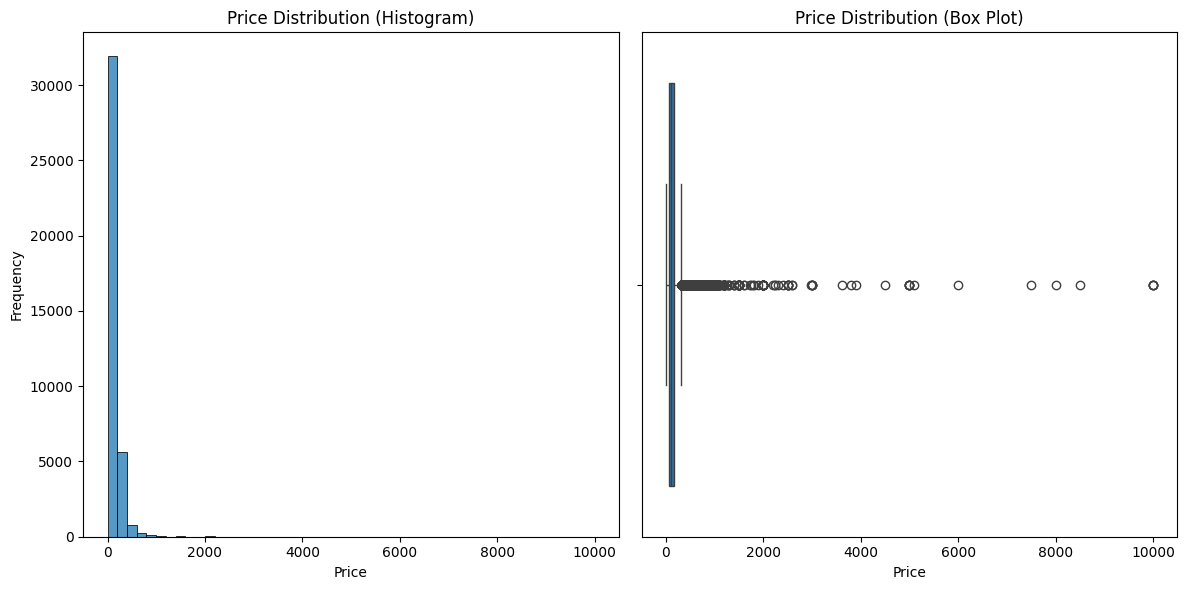

In [77]:
#visualizing numerical variables

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Histogram for 'price'
sns.histplot(df_subset['price'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Price Distribution (Histogram)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot 2: Box plot for 'price'
sns.boxplot(x='price', data=df_subset, ax=axes[1])
axes[1].set_title('Price Distribution (Box Plot)')
axes[1].set_xlabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

        as i see that most values are within 0 and 2000, none above 4000 , i apply log scale and adjust the plot

/tmp/ipykernel_34453/2557361617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['log_price'] = np.log1p(df_subset['price'])


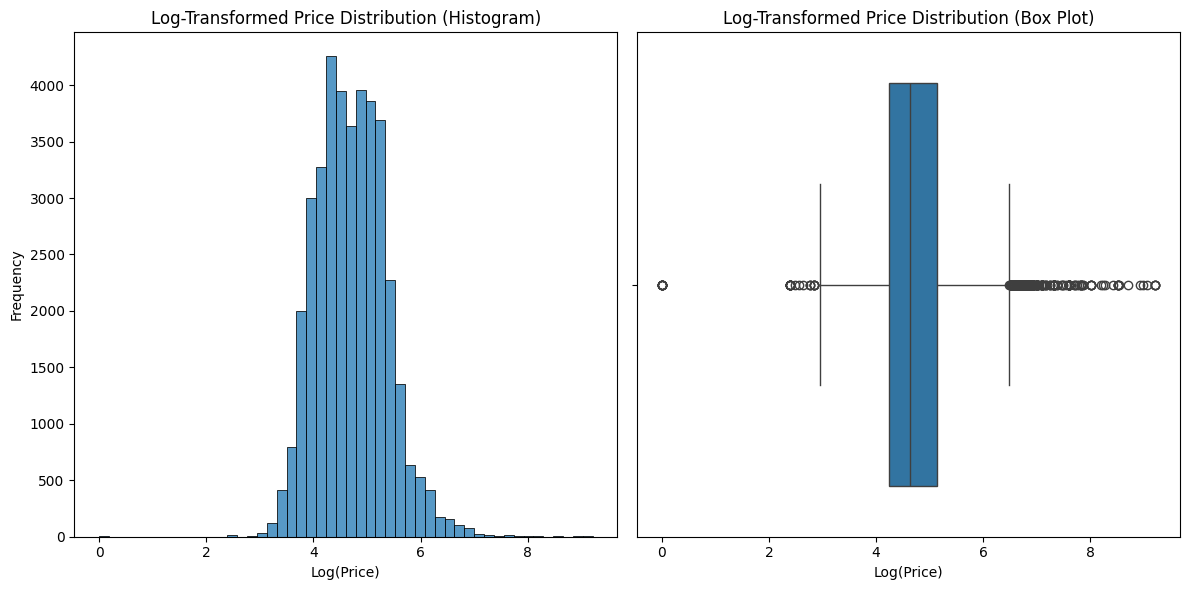

In [78]:
df_subset['log_price'] = np.log1p(df_subset['price'])

# Set the figure size and create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Histogram for log-transformed 'price'
sns.histplot(df_subset['log_price'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('Log-Transformed Price Distribution (Histogram)')
axes[0].set_xlabel('Log(Price)')
axes[0].set_ylabel('Frequency')

# Plot 2: Box plot for log-transformed 'price'
sns.boxplot(x='log_price', data=df_subset, ax=axes[1])
axes[1].set_title('Log-Transformed Price Distribution (Box Plot)')
axes[1].set_xlabel('Log(Price)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

analysing numerical variables in relation to other numerical variables

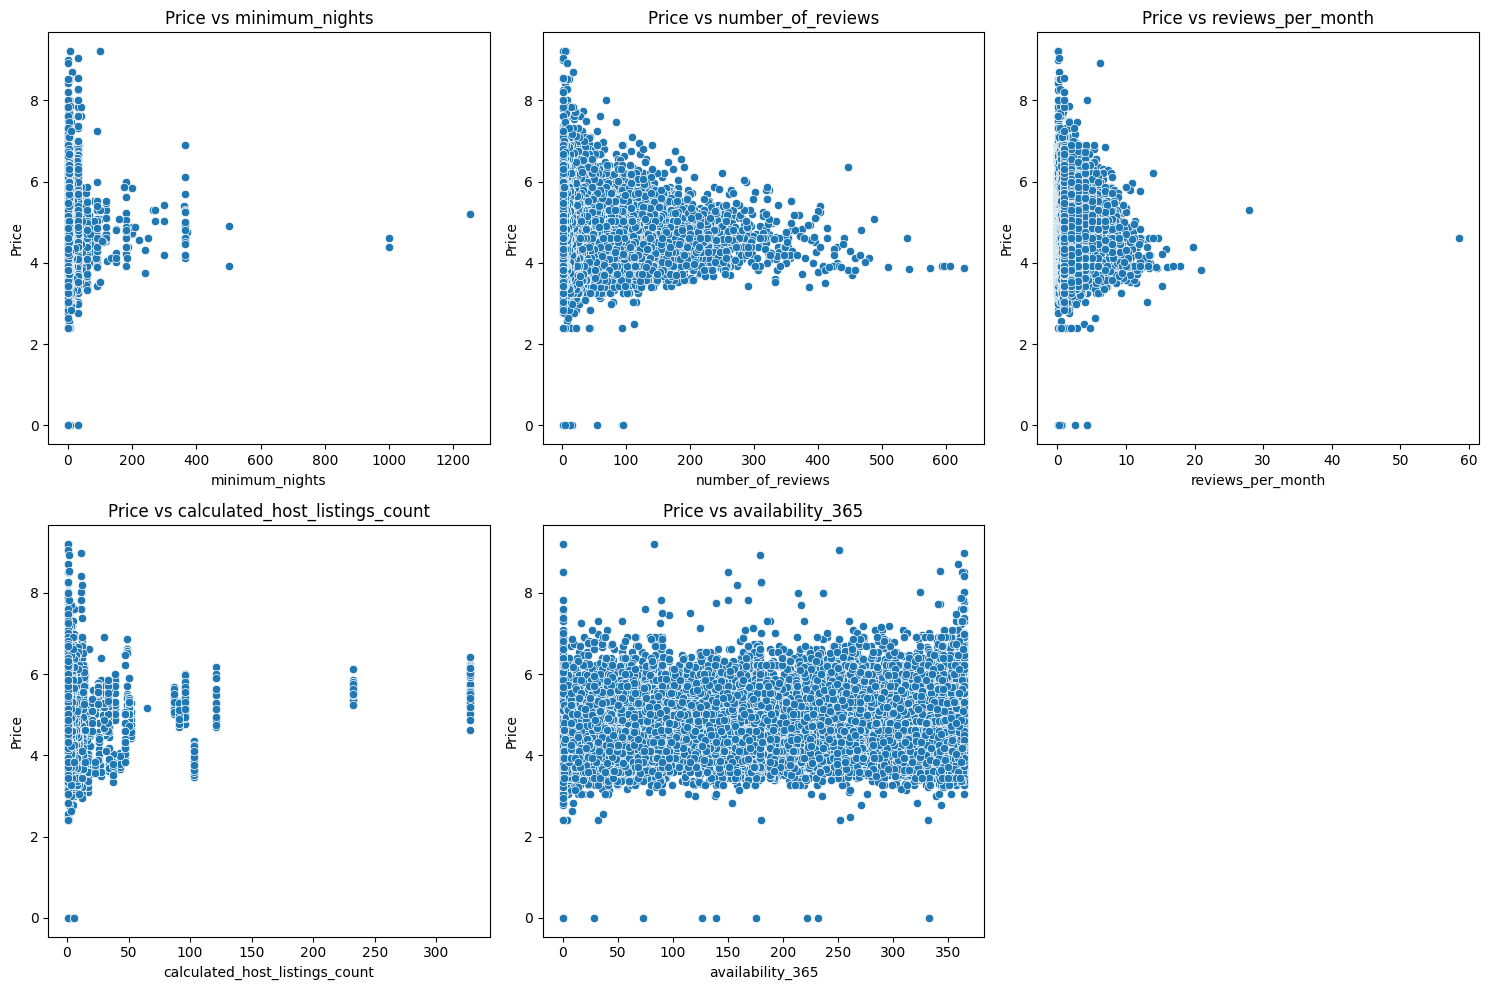

In [79]:
# Define the numeric variables to analyze (excluding latitude and longitude for now)
numeric_vars = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

# Set up the figure for subplots in a grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes to easily index them in the loop
axes = axes.flatten()

# Loop through each variable and create scatter plots with log-transformed price
for i, var in enumerate(numeric_vars):
    sns.scatterplot(ax=axes[i], x=df_subset[var], y=df_subset['log_price'])
    axes[i].set_title(f'Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

# Remove the last empty plot (axes[5]) if necessary
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

KeyboardInterrupt: 

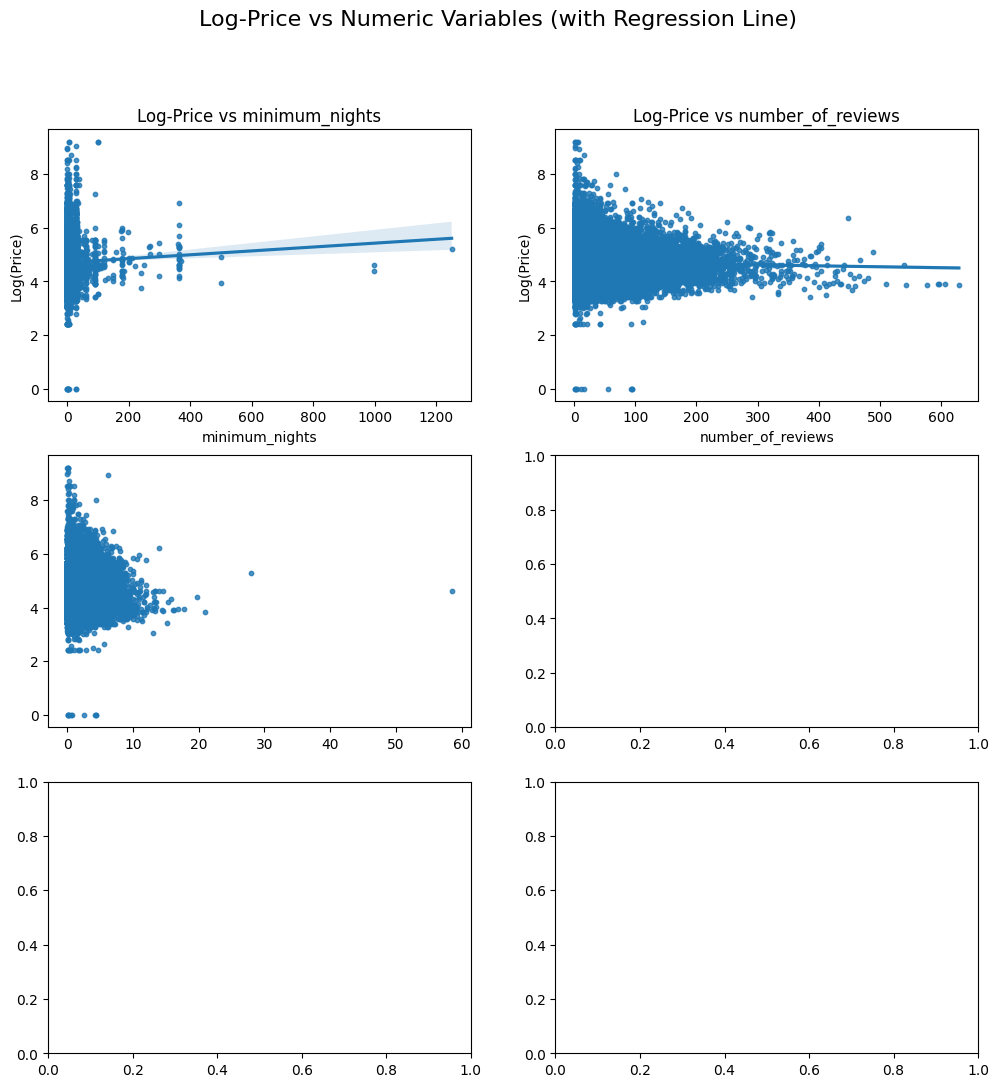

In [80]:
# Create a figure for regplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Log-Price vs Numeric Variables (with Regression Line)', fontsize=16)

# List of numeric variables (excluding price itself)
numeric_vars = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

# Plot regplots
for i, var in enumerate(numeric_vars):
    row, col = divmod(i, 2)
    sns.regplot(x=var, y='log_price', data=df_subset, ax=axs[row, col], scatter_kws={'s': 10})
    axs[row, col].set_title(f'Log-Price vs {var}')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Log(Price)')

# Remove the empty subplot (if the number of subplots is odd)
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# heatmap
# Select only the numeric columns for correlation
numeric_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Calculate the correlation matrix
correlation_matrix = df_subset[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

conclusions:

No Strong Predictors: None of the numeric variables have a strong correlation with price. The relationships, as shown by both the regplots and the heatmap, are mostly weak.

Both number_of_reviews and reviews_per_month show a slight negative relationship with price, indicating that more affordable listings tend to get reviewed more frequently.

calculated_host_listings_count shows a slight positive relationship with price, suggesting that professional hosts (with multiple listings) may price their properties a bit higher than individual hosts.


analysing categorical variables in relation to other categorical variables

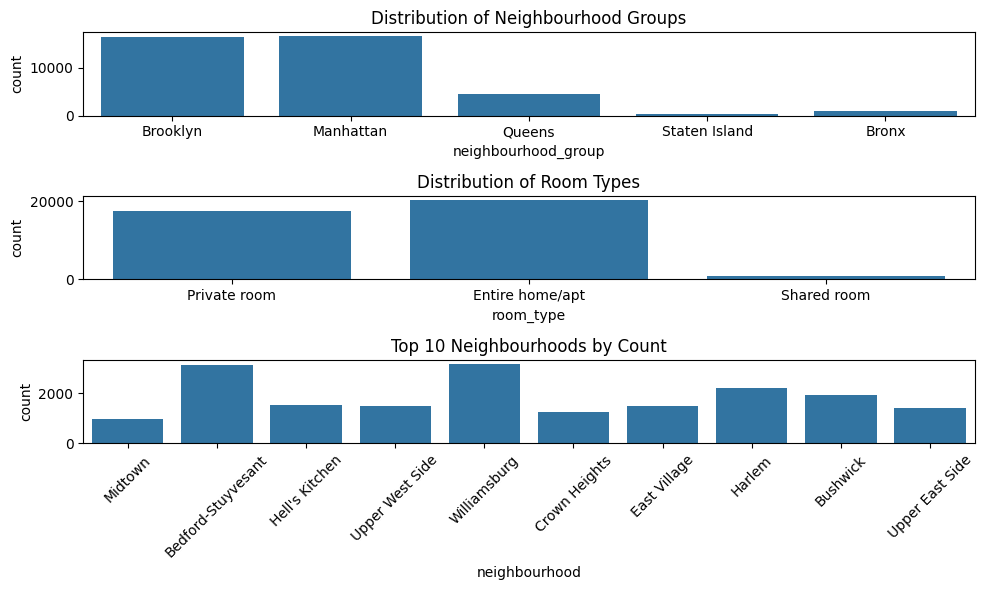

In [21]:
# using countplots

# Set the plot size
plt.figure(figsize=(10, 6))

# Count plot for 'neighbourhood_group'
plt.subplot(3, 1, 1)
sns.countplot(data=df_subset, x='neighbourhood_group')
plt.title('Distribution of Neighbourhood Groups')

# Count plot for 'room_type'
plt.subplot(3, 1, 2)
sns.countplot(data=df_subset, x='room_type')
plt.title('Distribution of Room Types')

# Count plot for 'neighbourhood' (optional: top 10 neighbourhoods)
plt.subplot(3, 1, 3)
top_10_neighbourhoods = df_subset['neighbourhood'].value_counts().nlargest(10).index
sns.countplot(data=df_subset[df_subset['neighbourhood'].isin(top_10_neighbourhoods)], 
              x='neighbourhood')
plt.title('Top 10 Neighbourhoods by Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


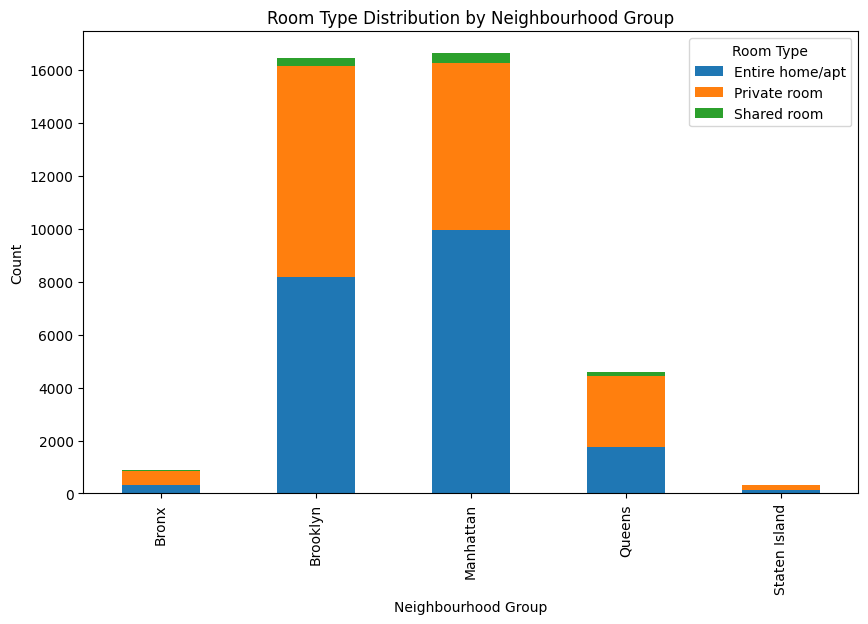

In [22]:
#stacked bar chart

# Create a crosstab (pivot table) for 'room_type' and 'neighbourhood_group'
room_type_vs_neighbourhood_group = pd.crosstab(df_subset['neighbourhood_group'], df_subset['room_type'])

# Plot a stacked bar chart
room_type_vs_neighbourhood_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Type Distribution by Neighbourhood Group')
plt.ylabel('Count')
plt.xlabel('Neighbourhood Group')
plt.legend(title='Room Type')
plt.show()


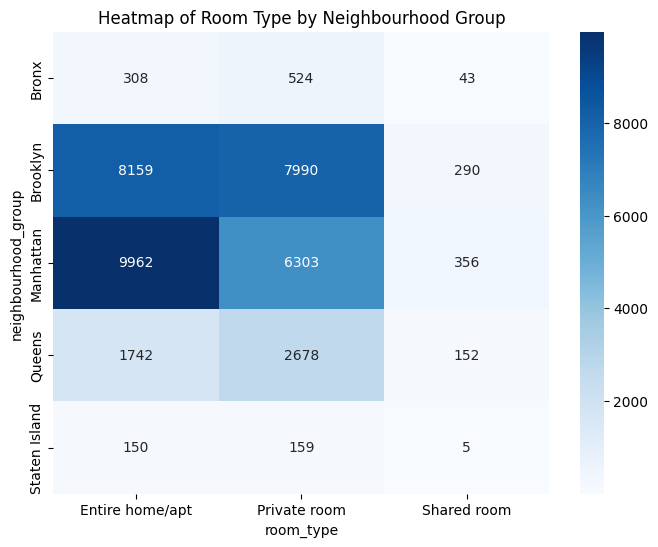

In [23]:
# Create a crosstab (pivot table) for 'neighbourhood_group' and 'room_type'
heatmap_data = pd.crosstab(df_subset['neighbourhood_group'], df_subset['room_type'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Room Type by Neighbourhood Group')
plt.show()


conclusions: 

Manhattan and Brooklyn are the Most Popular Neighborhood Groups: They account for the vast majority of Airbnb listings, with a relatively even split between entire homes/apartments and private rooms.
In Manhattan, entire homes/apartments are slightly more popular, while Brooklyn shows a more balanced distribution between private rooms and entire homes.

Queens and Bronx Have Fewer Listings:
These areas have fewer Airbnb listings overall, and private rooms are more common than entire homes/apartments.
Queens, in particular, has a higher proportion of private room listings compared to other neighborhood groups.
Staten Island Has the Fewest Listings:

Room Type Preferences:

Private rooms and entire homes/apartments dominate the listings across all neighborhood groups, with shared rooms being a very small portion of the market.

Popular Neighborhoods:
Midtown and Bedford-Stuyvesant are the most popular neighborhoods for Airbnb listings, with a large concentration of listings.
Other neighborhoods like Williamsburg, Upper West Side, and Harlem are also important Airbnb hubs.

analysing numerical variables in relation with categorical variables

Average Price per Room Type:
room_type
Entire home/apt    196.315929
Private room        83.985272
Shared room         63.213948
Name: price, dtype: float64


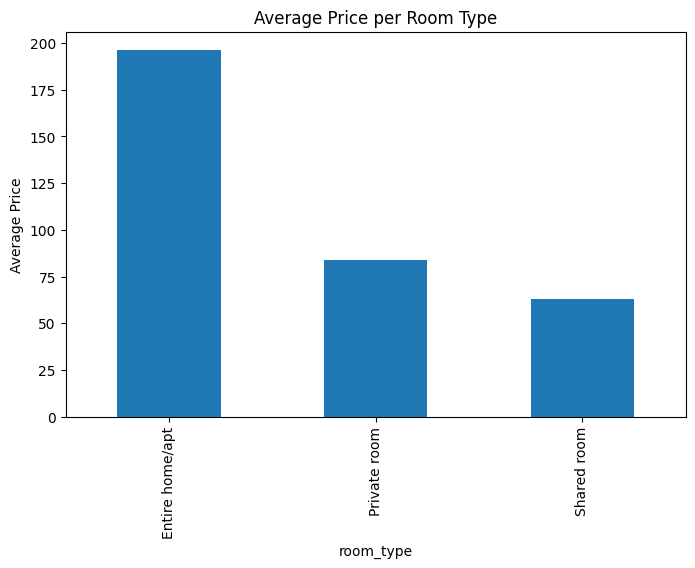

In [24]:
# Average price per room type
room_type_price = df_subset.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("Average Price per Room Type:")
print(room_type_price)

plt.figure(figsize=(8, 5))
room_type_price.plot(kind='bar')
plt.title('Average Price per Room Type')
plt.ylabel('Average Price')
plt.show()



Average Price per Neighbourhood Group:
neighbourhood_group
Manhattan        180.071596
Brooklyn         121.463289
Queens            95.783683
Staten Island     89.964968
Bronx             79.558857
Name: price, dtype: float64


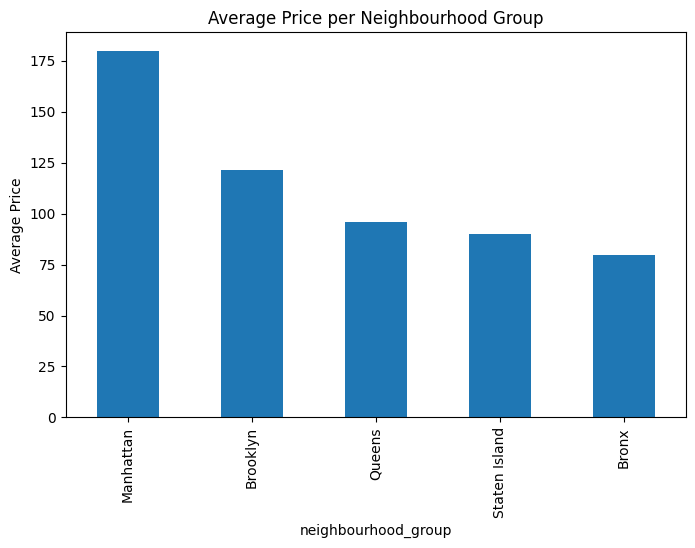

In [25]:
# Average price per neighbourhood group
neighbourhood_group_price = df_subset.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("Average Price per Neighbourhood Group:")
print(neighbourhood_group_price)

# Visualize average price per neighbourhood group
plt.figure(figsize=(8, 5))
neighbourhood_group_price.plot(kind='bar')
plt.title('Average Price per Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

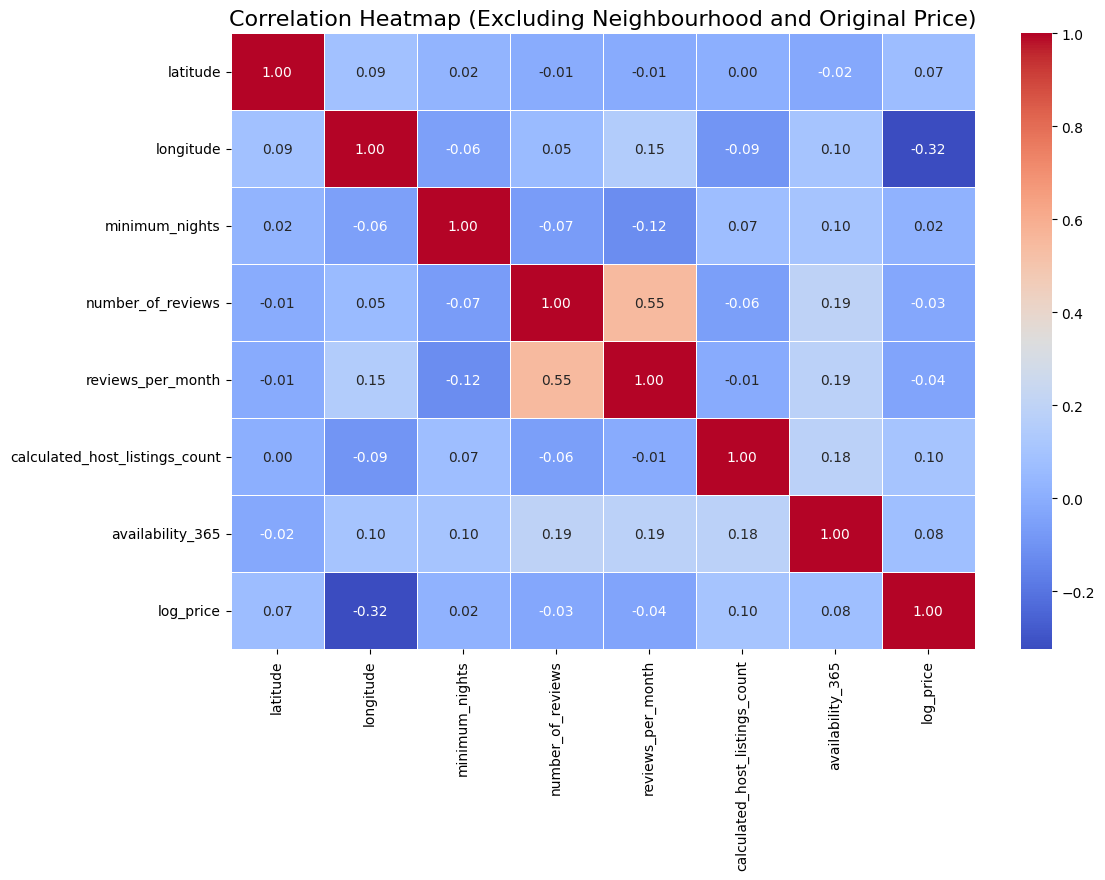

In [38]:
# One-hot encode 'neighbourhood_group' and 'room_type', excluding 'neighbourhood'
df_encoded = pd.get_dummies(df_subset, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Ensure all columns are numeric, filtering out any non-numeric columns
df_numeric = df_encoded.select_dtypes(include=[float, int])

# Drop the original 'price' column, keeping 'log_price'
if 'price' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['price'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with Seaborn, using 'annot=True' to display the correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set title and display the heatmap
plt.title('Correlation Heatmap (Excluding Neighbourhood and Original Price)', fontsize=16)
plt.show()

Longitude vs Log-Price (-0.32): The negative correlation here is likely related to geographical factors, with prices tending to be higher in western areas (Manhattan, western Brooklyn) and lower further east.
this is the only relevant correlation that can be observed. 
of course, about the review per month, we can assume that listings that receive more reviews overall are likely to also get more frequent reviews per month.

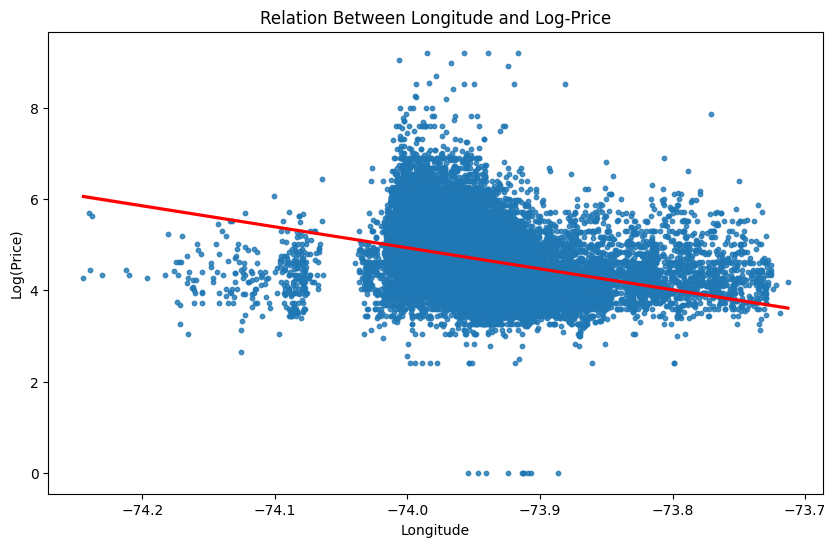

In [39]:
# Create the regplot for longitude vs log_price
plt.figure(figsize=(10, 6))
sns.regplot(x='longitude', y='log_price', data=df_subset, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relation Between Longitude and Log-Price')
plt.xlabel('Longitude')
plt.ylabel('Log(Price)')
plt.show()

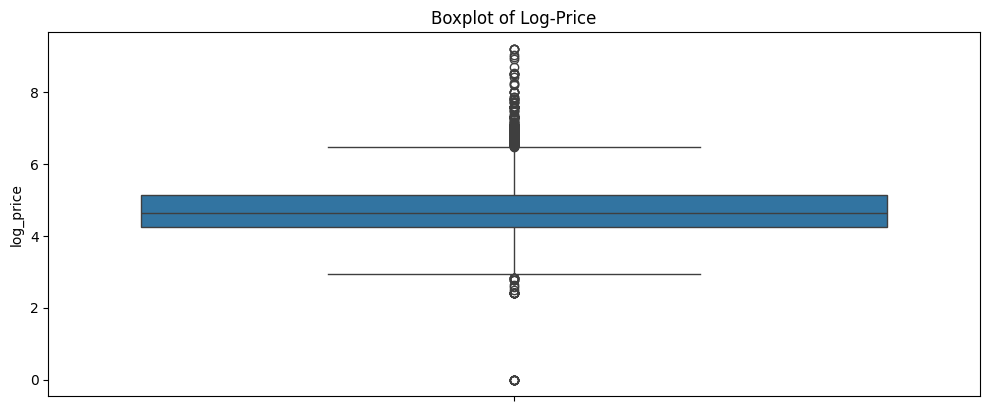

In [49]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Box plot for 'log_price'
plt.subplot(2, 1, 1)
sns.boxplot(y=df_subset['log_price'])
plt.title('Boxplot of Log-Price')


plt.tight_layout()
plt.show()

In [43]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'log_price' 
df_no_outliers = remove_outliers(df_subset, 'log_price')

# Check the shape of the new DataFrame
print(f"Data shape after removing outliers: {df_no_outliers.shape}")

Data shape after removing outliers: (38396, 12)


In [45]:
numeric_summary = df_no_outliers.describe()
display(numeric_summary)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
count,38396.000000,38396.000000,38396.000000,38396.000000,38396.000000,38396.000000,38396.000000,38396.000000,38396.000000
mean,40.728049,-73.950924,130.914314,5.849932,29.435176,1.377776,5.154183,113.821075,4.686847
std,0.055133,0.046757,91.191179,17.344256,48.349803,1.684411,26.412422,129.085144,0.616114
min,40.506410,-74.244420,18.000000,1.000000,1.000000,0.010000,1.000000,0.000000,2.944439
25%,40.688540,-73.982330,68.000000,1.000000,3.000000,0.190000,1.000000,0.000000,4.234107
50%,40.721470,-73.954600,100.000000,2.000000,9.500000,0.720000,1.000000,54.000000,4.615121
75%,40.763090,-73.934760,165.000000,4.000000,33.000000,2.030000,2.000000,225.000000,5.111988
max,40.913060,-73.712990,650.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,6.478510


In [50]:
# Check for missing values
missing_values = df_no_outliers.isnull().sum()
missing_percent = (missing_values / len(df_no_outliers)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


it seems that there are no missing values 

feature merging

In [54]:
# latitude and longitude into a Location-Based Feature

# Define the coordinates for the center of Manhattan (or any reference point)
manhattan_center = (40.7831, -73.9712)  # Example: Manhattan's approximate center

# Calculate the distance using Euclidean distance and use .loc to avoid the warning
df_subset.loc[:, 'distance_from_manhattan'] = np.sqrt(
    (df_subset['latitude'] - manhattan_center[0])**2 + (df_subset['longitude'] - manhattan_center[1])**2
)

# Check the new feature
display(df_subset[['latitude', 'longitude', 'distance_from_manhattan']].head())

,latitude,longitude,distance_from_manhattan
0,40.64749,-73.97237,0.135615
1,40.75362,-73.98377,0.032048
3,40.68514,-73.95976,0.098626
4,40.79851,-73.94399,0.031271
5,40.74767,-73.97500,0.035633


In [57]:
 #price per room type feature

# Calculate the average price per room type and use .loc for assignment
df_subset.loc[:, 'price_per_room_type'] = df_subset.groupby('room_type')['log_price'].transform('mean')

# Check the new feature
display(df_subset[['room_type', 'log_price', 'price_per_room_type']].head())

,room_type,log_price,price_per_room_type
0,Private room,5.010635,4.286251
1,Entire home/apt,5.420535,5.105973
3,Entire home/apt,4.499810,5.105973
4,Entire home/apt,4.394449,5.105973
5,Entire home/apt,5.303305,5.105973


In [59]:
#popularity feature

# Create a new feature for popularity using .loc to avoid warnings
df_subset.loc[:, 'popularity_index'] = df_subset['number_of_reviews'] * df_subset['reviews_per_month']

# Check the new feature
display(df_subset[['number_of_reviews', 'reviews_per_month', 'popularity_index']].head())

,number_of_reviews,reviews_per_month,popularity_index
0,9,0.21,1.89
1,45,0.38,17.10
3,270,4.64,1252.80
4,9,0.10,0.90
5,74,0.59,43.66


In [61]:
display(df_subset.head())

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,distance_from_manhattan,price_per_room_type,popularity_index
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635,0.135615,4.286251,1.89
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535,0.032048,5.105973,17.10
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810,0.098626,5.105973,1252.80
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449,0.031271,5.105973,0.90
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,5.303305,0.035633,5.105973,43.66


In [62]:
# Separate features (X) and the target variable (y)
X = df_subset.drop(columns=['log_price'])  # Features
y = df_subset['log_price']  # Target variable (log-transformed price)

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (31056, 14)
Test data shape: (7765, 14)
